# Sistemas de recomendación / Tu futuro según la DATA

In [78]:
#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier



In [2]:
#Cargamos CSV
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2326&path=adult-census-income.csv"
pd.read_csv(url).to_csv("../data/raw/adult-census-income.csv", index=False)

In [3]:

#Visualización preliminar del conjunto de datos
df = pd.read_csv("../data/raw/adult-census-income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#Dimensiones del DataFrame
df.shape

(32561, 15)

In [5]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Mostrar resumen estadístico básico del dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Comprobación de nulos
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [8]:
#Mostrar duplicados del dataset
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Hay un total de {num_duplicados} duplicados en el Dataset")

Hay un total de 24 duplicados en el Dataset


In [9]:
#Elminamos duplicados del dataset
df = df.drop_duplicates()
print(f"La dimensión del Dataset después de eliminar los duplicados es de {df.shape}")

La dimensión del Dataset después de eliminar los duplicados es de (32537, 15)


In [10]:
#Remplazamos "?" por NaN (siendo que, si se ve arriba en la primera visualización, tenemos datos con interrogación)
df = df.replace("?", np.nan)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
#Contabilizamos ahora el valor de los NaN
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64


La tarea de este ejercicio es saber qué factores son los que pueden hacer que un sujeto tenga éxito, y entendamos éxito = mayor entrada de dinero...

In [12]:
#Resumen completo del DataFrame / tras limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
#Visualización preliminar del conjunto de datos / tras limpieza
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


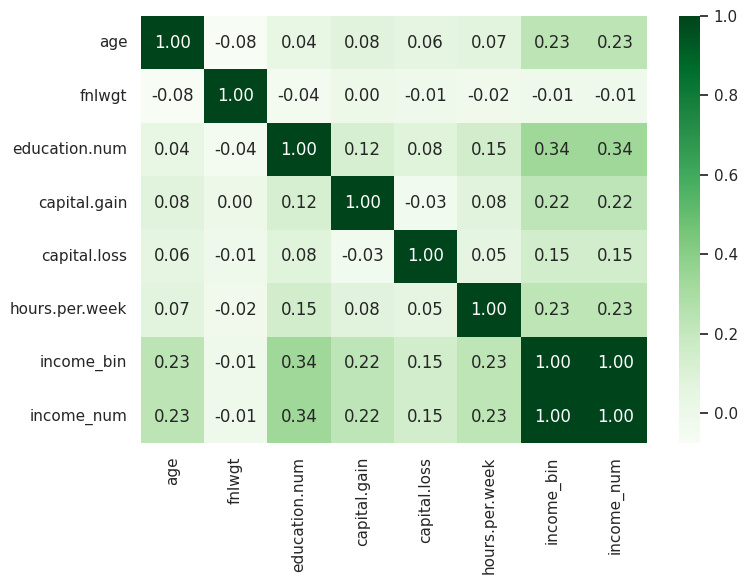

In [45]:

#Grafico correlacion heatmap

numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.tight_layout()
plt.show()

Elegimos valores que serán de peso para este análisis

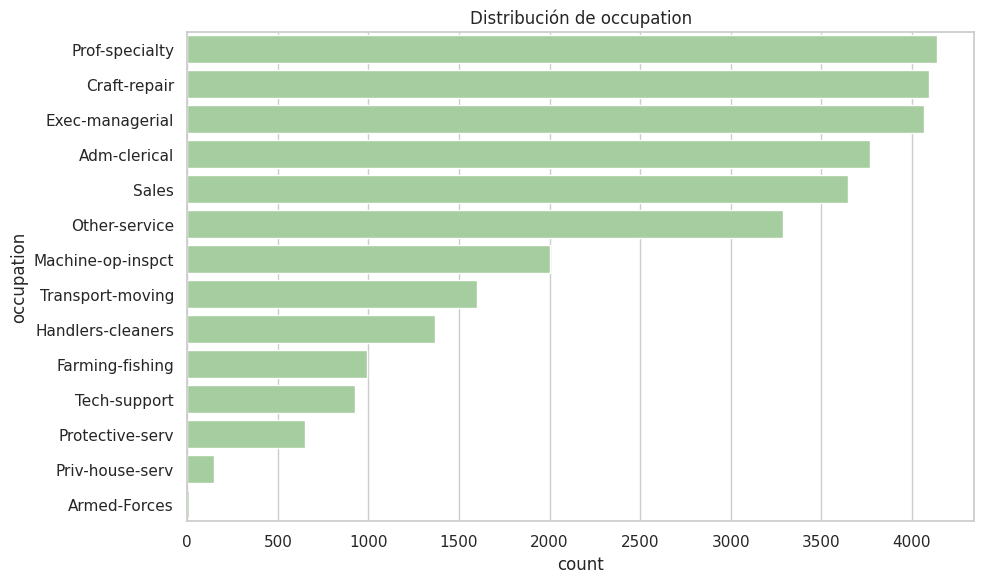

In [46]:
plt.figure(figsize=(10, 6))

order = df["occupation"].value_counts().index
sns.countplot(data=df, y="occupation", order=order, color="#a1d498")

plt.title("Distribución de occupation")
plt.tight_layout()
plt.show()


In [16]:
#Sacamos una visualización de "income"
df["income"].value_counts(normalize=True)

income
<=50K    0.759074
>50K     0.240926
Name: proportion, dtype: float64

Veremos como se comportan las categorias numéricas vs income

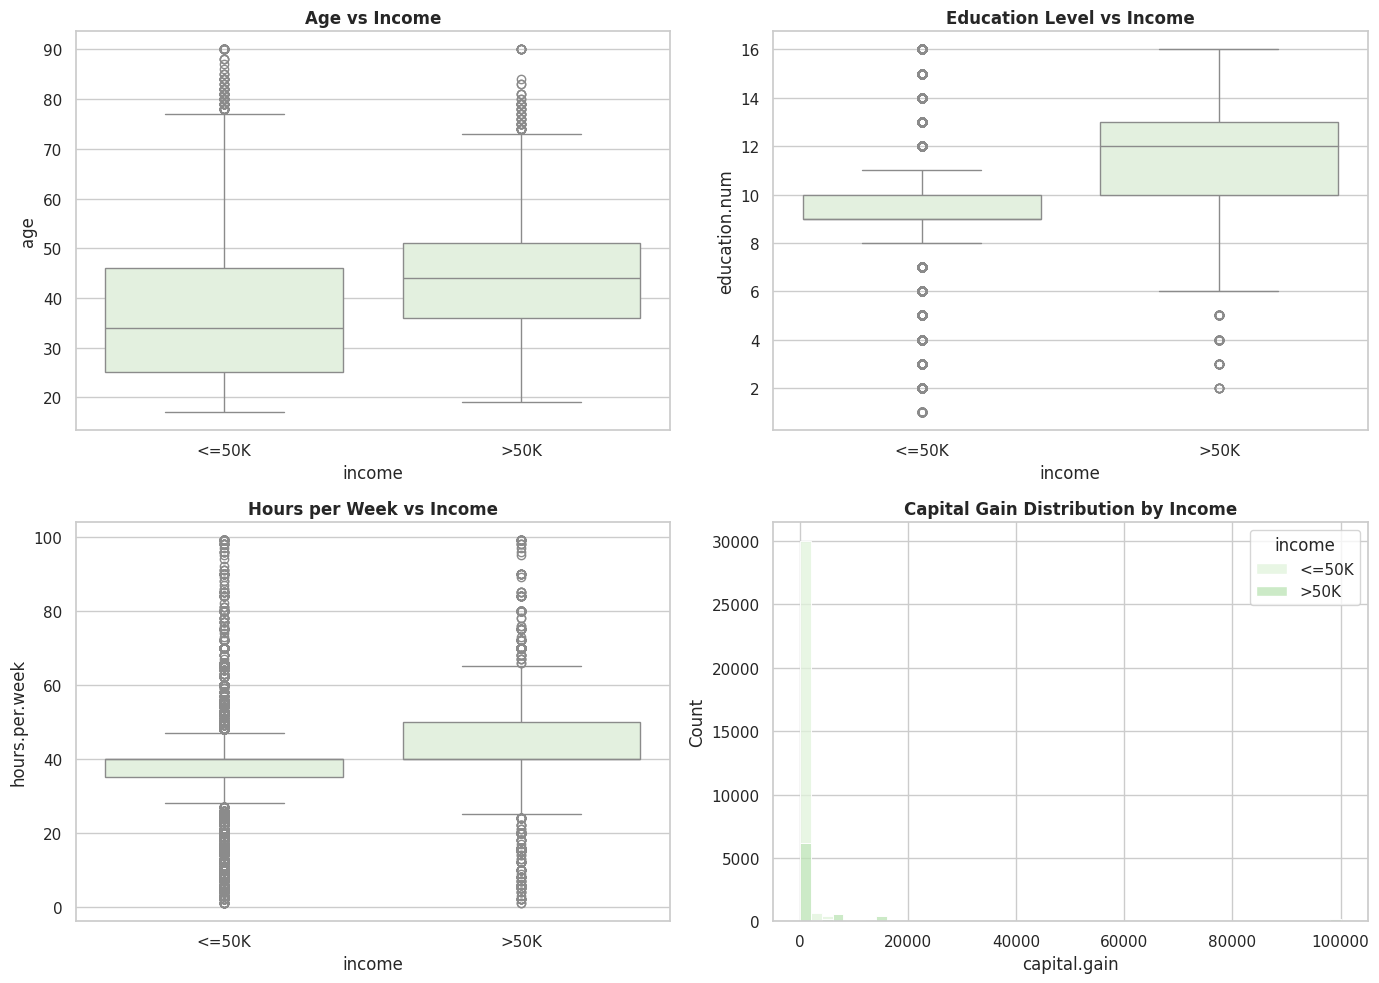

In [21]:
#Graficamos categorias numéricas vs "income"

#Diseño para las gráficas
sns.set_theme(style="whitegrid", palette="Greens")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Age vs Income
sns.boxplot(data=df, x="income", y="age", ax=axes[0, 0])
axes[0, 0].set_title("Age vs Income", fontweight="bold")

#Education.num vs Income
sns.boxplot(data=df, x="income", y="education.num", ax=axes[0, 1])
axes[0, 1].set_title("Education Level vs Income", fontweight="bold")

#Hours per week vs Income
sns.boxplot(data=df, x="income", y="hours.per.week", ax=axes[1, 0])
axes[1, 0].set_title("Hours per Week vs Income", fontweight="bold")

#Capital gain distribution
sns.histplot(data=df, x="capital.gain", hue="income", bins=50, multiple="stack", ax=axes[1, 1])
axes[1, 1].set_title("Capital Gain Distribution by Income", fontweight="bold")

plt.tight_layout()
plt.show()


Veremos como se comportan las categorias categóricas vs income

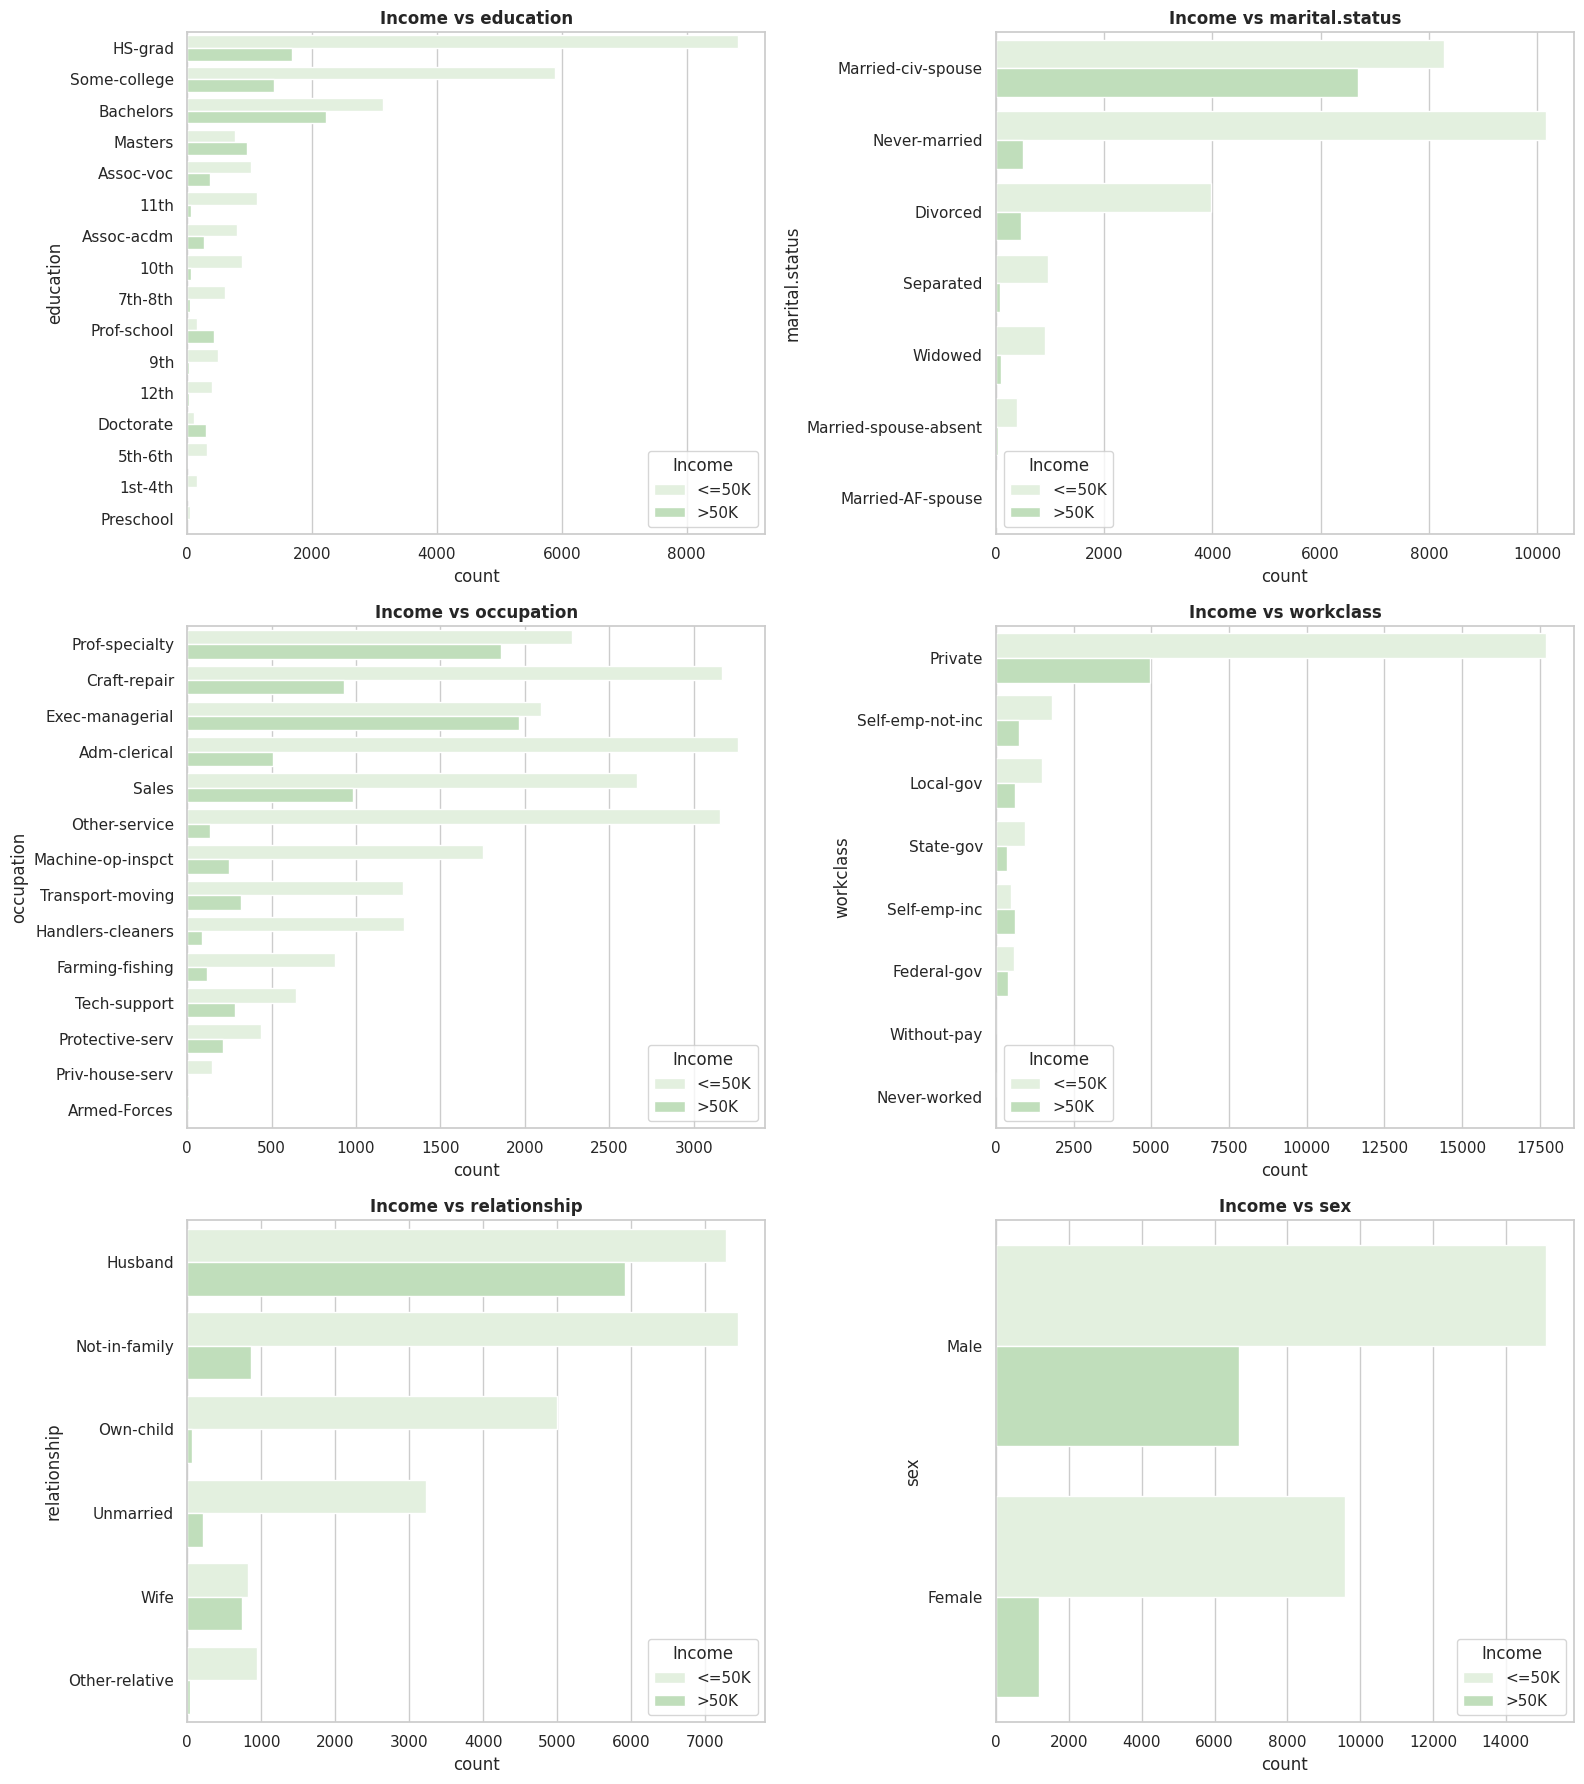

In [22]:
#Graficamos categorias categóricas vs "income"

#Diseño para las gráficas
sns.set_theme(style="whitegrid", palette="Greens")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

categorical_cols = ["education", "marital.status", "occupation", "workclass", "relationship", "sex"]

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, y=col, hue="income", order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Income vs {col}", fontweight="bold")
    ax.legend(title="Income")

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Proporción de ingresos >50K por nivel educativo'}, ylabel='education'>

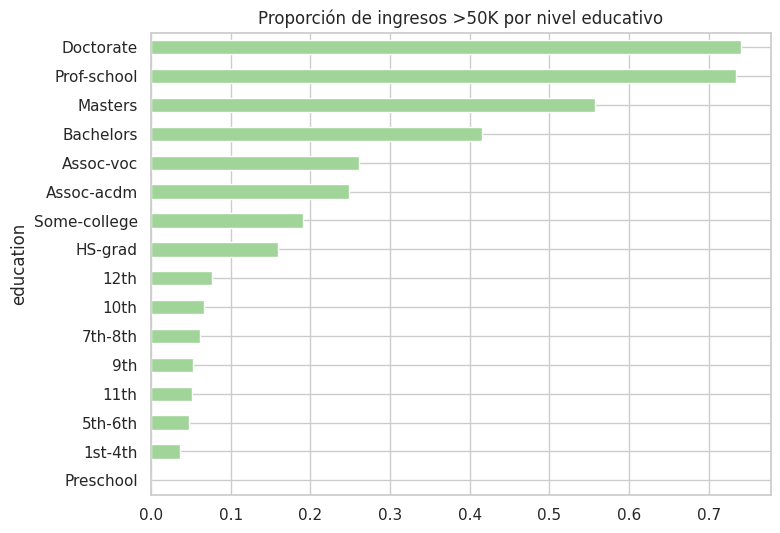

In [32]:
#Graficamos education vs income

prop_income = pd.crosstab(
    df["education"],
    df["income"],
    normalize="index"
)

prop_income[">50K"].sort_values().plot(
    kind="barh",
    color="#a1d498",
    figsize=(8, 6),
    title="Proporción de ingresos >50K por nivel educativo"
)

El nivel educativo no solo influye en la cantidad de personas con altos ingresos, sino en la probabilidad individual de alcanzar los >50K

In [72]:
df["income_bin"] = np.where(df["income"] == ">50K", 1, 0)


In [73]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c != "income"]  # no incluimos target original
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [88]:
X = df_encoded.drop(columns=["income", "income_num", "income_bin"], errors="ignore")
y = df_encoded["income_bin"]  # o "income_num" si prefieres

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [90]:
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    n_jobs=-1,
    random_state=42,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [91]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8661647203441918
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4940
           1       0.77      0.64      0.70      1568

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

ROC AUC: 0.9224012770594068


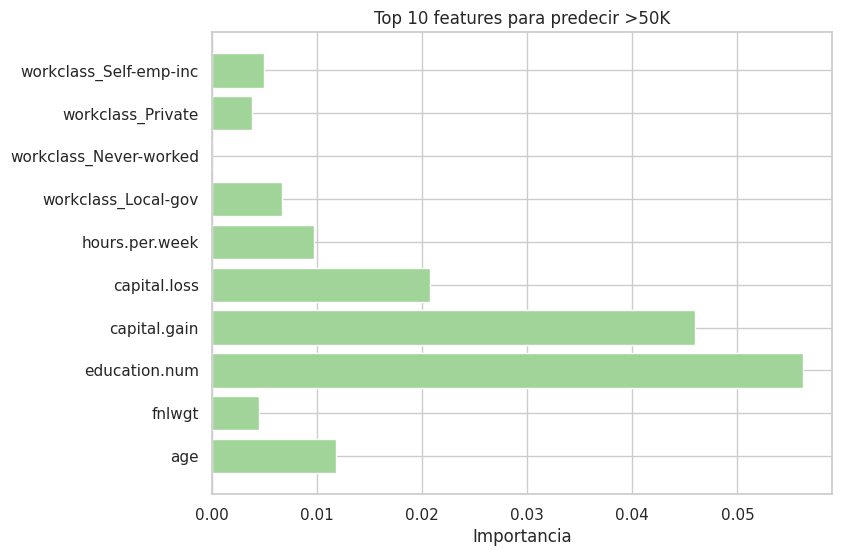

In [92]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(features[:10], importances[:10], color="#a1d498")  # tus tonos de verde favoritos
plt.xlabel("Importancia")
plt.title("Top 10 features para predecir >50K")
plt.show()

Vamos a crear perfiles para usar con el modelo

In [ ]:
def recommend_profile(profile, top_features, model=model):
    """
    Recomienda mejoras en el perfil simulando cambios en las variables más importantes.
    
    Args:
        profile: DataFrame de un solo usuario (como creado por create_profile)
        top_features: Lista de las features más importantes
        model: modelo XGBClassifier ya entrenado
    """
    # Probabilidad base
    base_prob = model.predict_proba(profile)[0, 1]
    print(f"Probabilidad actual de >50K: {base_prob:.2f}")
    
    # Copiamos para modificar
    profile_sim = profile.copy()
    changes = {}
    
    # Recorremos las top_features
    for feat in top_features:
        if feat in profile_sim.columns:
            if profile_sim[feat].dtype in [np.int64, np.float64]:
                # Incrementamos numéricos un paso razonable (10% del valor o +1)
                inc = profile_sim[feat].iloc[0] * 0.1 + 1
                profile_sim[feat] += inc
                changes[feat] = profile_sim[feat].iloc[0]
            else:
                # Si es dummy, simplemente activamos la columna
                profile_sim[feat] = 1
                changes[feat] = 1
    
    # Probabilidad tras cambios
    final_prob = model.predict_proba(profile_sim)[0, 1]
    
    print("\n✅ Sugerencias de cambio:")
    for k, v in changes.items():
        print(f" - {k}: set a {v}")
    
    print(f"\nProbabilidad final tras sugerencias: {final_prob:.2f}")
    # Visualizamos cambios en gráfico
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(["Base", "Optimizado"], [base_prob, final_prob], color=["#a1d498", "#4a9c57"])
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probabilidad de >50K")
    ax.set_title("Impacto de cambios en el perfil")
    plt.show()


In [102]:
def create_profile_fixed(**kwargs):
    profile = pd.DataFrame(columns=X.columns)
    
    for col in X.columns:
        # Si es una dummy
        if "_" in col and col not in kwargs:
            profile[col] = [0]
        elif col in kwargs:
            profile[col] = [kwargs[col]]
        else:
            profile[col] = [0]
    
    # Ajuste automático para dummies de categorías
    for key, value in kwargs.items():
        dummy_col = f"{key}_{value}"
        if dummy_col in X.columns:
            profile[dummy_col] = 1
    
    return profile


In [109]:


def recommend_profile(model, perfil_base, X_train, top_features, increment_num=1):
    """
    Recibe:
    - model: modelo XGBClassifier ya entrenado
    - perfil_base: dict con el perfil inicial
    - X_train: DataFrame de entrenamiento (para alinear columnas y dummies)
    - top_features: lista de features más importantes
    - increment_num: cantidad de incremento para variables numéricas
    
    Devuelve:
    - Perfil recomendado con probabilidades antes y después
    """
    # Convertimos a DataFrame con una fila
    perfil_df = pd.DataFrame([perfil_base])
    
    # Aplicamos get_dummies, alineando columnas con X_train
    perfil_mod = pd.get_dummies(perfil_df)
    perfil_mod = perfil_mod.reindex(columns=X_train.columns, fill_value=0)
    
    # Probabilidad inicial
    prob_actual = model.predict_proba(perfil_mod)[:, 1][0] * 100
    
    sugerencias = []
    
    # Aplicamos sugerencias según top_features
    for feat in top_features:
        if feat in perfil_mod.columns:
            # Si es numérico, incrementamos
            if np.issubdtype(perfil_mod[feat].dtype, np.number):
                perfil_mod[feat] += increment_num
                sugerencias.append(f"Sube ligeramente {feat} para mejorar ingresos")
            else:
                # Si es dummy, encenderla y apagar otras dummies de la misma categoría
                if "_" in feat:
                    base_col = feat.split("_")[0]
                    for col in perfil_mod.columns:
                        if col.startswith(base_col):
                            perfil_mod[col] = 0
                    perfil_mod[feat] = 1
                    sugerencias.append(f"Considera cambiar {base_col} a '{feat.split('_')[1]}' para mejorar ingresos")
    
    # Probabilidad final tras aplicar cambios
    prob_final = model.predict_proba(perfil_mod)[:, 1][0] * 100
    
    # Mostrar resultados
    print(f"Probabilidad actual de >50K: {prob_actual:.1f}%\n")
    print("✅ Sugerencias accionables:")
    for s in sugerencias:
        print(" -", s)
    print(f"\nProbabilidad final tras aplicar sugerencias: {prob_final:.1f}%\n")
    return prob_actual, prob_final, sugerencias

# --- PERFILES SIMULADOS ---
# Vamos a definir 5 perfiles distintos
perfiles = [
    {"age":25, "education.num":9, "hours.per.week":40, "occupation":"Prof-specialty", 
     "workclass":"Private", "marital.status":"Never-married", "sex":"Male"},

    {"age":35, "education.num":12, "hours.per.week":50, "occupation":"Exec-managerial", 
     "workclass":"Private", "marital.status":"Married-civ-spouse", "sex":"Female"},

    {"age":28, "education.num":7, "hours.per.week":35, "occupation":"Machine-op-inspct", 
     "workclass":"Local-gov", "marital.status":"Divorced", "sex":"Male"},

    {"age":45, "education.num":14, "hours.per.week":45, "occupation":"Prof-specialty", 
     "workclass":"Self-emp-not-inc", "marital.status":"Married-civ-spouse", "sex":"Female"},

    {"age":30, "education.num":10, "hours.per.week":40, "occupation":"Other-service", 
     "workclass":"Private", "marital.status":"Never-married", "sex":"Male"}
]

# Tomamos los top 5 features importantes para simplificar
top_features = model.feature_importances_.argsort()[::-1][:5]
top_features_names = X_train.columns[top_features].tolist()

# Ejecutamos recomendaciones para cada perfil
for i, perfil in enumerate(perfiles, 1):
    print(f"--- PERFIL {i} ---")
    recommend_profile(model, perfil, X_train, top_features_names)


--- PERFIL 1 ---
Probabilidad actual de >50K: 2.8%

✅ Sugerencias accionables:
 - Sube ligeramente marital.status_Married-civ-spouse para mejorar ingresos
 - Sube ligeramente education.num para mejorar ingresos
 - Sube ligeramente capital.gain para mejorar ingresos
 - Sube ligeramente relationship_Own-child para mejorar ingresos
 - Sube ligeramente occupation_Other-service para mejorar ingresos

Probabilidad final tras aplicar sugerencias: 4.7%

--- PERFIL 2 ---
Probabilidad actual de >50K: 58.6%

✅ Sugerencias accionables:
 - Considera cambiar marital.status a 'Married-civ-spouse' para mejorar ingresos
 - Sube ligeramente education.num para mejorar ingresos
 - Sube ligeramente capital.gain para mejorar ingresos
 - Sube ligeramente relationship_Own-child para mejorar ingresos
 - Sube ligeramente occupation_Other-service para mejorar ingresos

Probabilidad final tras aplicar sugerencias: 23.8%

--- PERFIL 3 ---
Probabilidad actual de >50K: 1.2%

✅ Sugerencias accionables:
 - Sube ligera